# **ДОМАШНЕЕ ЗАДАНИЕ № 1_Часть 2**

# Import библиотек


In [50]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
from google.colab import files  # чтобы загружать файлы в облако через проводник 

import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации

from sklearn.model_selection import train_test_split #  функция разбиения на тренировочную и тестовую выборку
from sklearn.preprocessing import MinMaxScaler # Объект Нормализации от Scikit-learn
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

# Загружаем наши данные из файла по прямой ссылке на git-hub

Загружаем наши данные из файла по прямой ссылке на git-hub

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/dayekb/Basic_ML_Alg/main/cars_moldova_cat_num.csv', delimiter = ',') # можно считывать открытые файлы из интернета
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),km_year
0,40,92,2011,4,195000.0,1800.0,2,1,7750.0,17727.272727
1,32,62,2014,11,135000.0,1500.0,0,0,8550.0,16875.000000
2,32,71,2012,11,110000.0,1500.0,0,0,6550.0,11000.000000
3,28,23,2006,11,200000.0,1600.0,3,0,4100.0,12500.000000
4,23,124,2000,5,300000.0,2200.0,0,0,3490.0,13636.363636
...,...,...,...,...,...,...,...,...,...,...
32069,42,88,2016,10,88000.0,1800.0,4,1,11500.0,14666.666667
32070,19,53,2002,3,225000.0,1800.0,3,0,4400.0,11250.000000
32071,6,77,2015,11,89000.0,1500.0,0,0,7000.0,12714.285714
32072,22,10,2006,1,370000.0,2000.0,0,0,4000.0,23125.000000


# Посчитаем число численных и категориальных колонок

In [31]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']


# Линейная регрессия

In [32]:
from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn

from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

Считываем данные, разбиваем на тестовую и тренировочную, нормализуем

In [33]:
df_num = df[num_columns].copy() # берем, например только числовые данные 

# не забываем удалить целевую переменную цену из признаков
X,y = df_num.drop(columns = ['km_year']).values,df_num['km_year'].values

# разбиваем на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# нормализуем 
scaler  = MinMaxScaler()
scaler.fit(X_train)  # для тренировочных сначала "обучаем"
X_train = scaler.transform(X_train) # потом преобразуем  transform 
X_test  = scaler.transform(X_test)  # для тестовых - просто transform 

In [34]:
def weights_vis(B, B0, features_names):
    """Модифицированная функция для отрисовки весов.   
    Входные переменные:
    ===========
    B: веса признаков 
    B0: смещение
    features_names: список названий признаков
    """
    numbers = np.arange(0,len(features_names)+1) # создаем массив от 0 до количество признаков
    Bs = np.hstack([B0,B]) #объединяем смещение и веса признаков
    cc=['']*len(numbers) # сюда будем складывать цвет в который будем подкрашивать 
    for n,val in enumerate(Bs): #перебираем все веса
        if val<0: # если отрицательный вес - то красный
            cc[n]='red'
        elif val>=0: # если положительный - то синий
            cc[n]='blue'

    plt.bar(x = numbers, height = Bs, color = cc) # рисуем столбчатую диаграмму. с разными цветами
    #подписи к столбцам
    plt.xticks(np.arange(0,len(features_names)+1),
               np.hstack(['b0', features_names]),
               rotation = 45 ); # поскольку длина может быть большой - поварачиваем на 45 градусов

In [35]:
def print_stem(y, label, marker):
    markerline, stemlines, baseline = plt.stem(y, markerfmt=marker,label = label,use_line_collection = True, )
    markerline.set_markerfacecolor('none')

# Регуляризация Линейной Регрессии

In [36]:
from sklearn.linear_model import Lasso # L1-регуляризация
from sklearn.linear_model import Ridge # L2-регуляризация

## Lasso

Решение
-6639.91+20470.52*Year+17395.84*Distance


Ошибка на тестовых данных
MSE: 23184318.0
RMSE: 4815.0
R2 : 0.5518


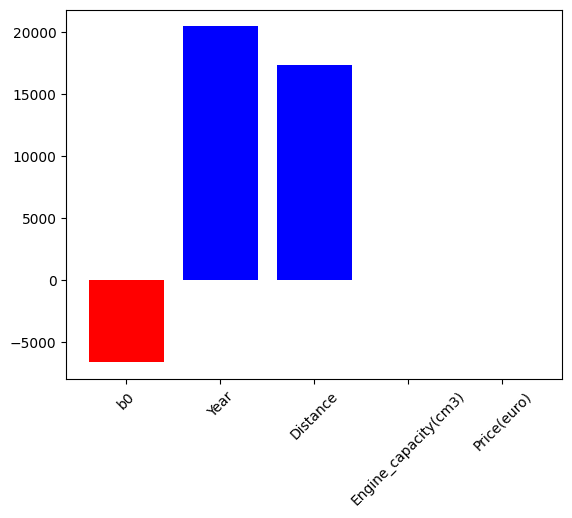

In [37]:
#@title Регуларизация Lasso { run: "auto" }
#@markdown ### Константа Регуларизации
alpha=241.01 #@param {type:"slider", min:0.01, max:250, step:1}

model = Lasso(alpha=alpha,max_iter=10000 )

model.fit(X_train, y_train)

B0=model.intercept_
B=model.coef_

line='{:.2f}'.format(B0)
sign=['+','-']

features_names = df_num.drop(columns = ['km_year']).columns
for p,(fn,b) in enumerate(zip(features_names,B)):
  if np.abs(b)>0:
    line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

print('Решение')
print(line)
print('\n')

y_predict=model.predict(X_test)

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))
print('R2 : %.4f' %  r2_score(y_test,y_predict))

weights_vis(B, B0, features_names)

## Поиск Лучших Гиперпараметров с Помощью Рандомизированного Поиска

In [38]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

In [39]:
alpha_range = loguniform(1e-4, 1e4) 

tuned_parameters = [{'alpha':  alpha_range }]

n_iter_search = 25

Lasso_search = RandomizedSearchCV(estimator = Lasso(max_iter=10000 ), verbose = 3,
                          param_distributions=tuned_parameters ,
                          cv=ShuffleSplit(n_splits=5, random_state=42),n_iter = n_iter_search)

Lasso_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........alpha=11.042142638313642;, score=0.703 total time=   0.0s
[CV 2/5] END ..........alpha=11.042142638313642;, score=0.684 total time=   0.0s
[CV 3/5] END ..........alpha=11.042142638313642;, score=0.703 total time=   0.0s
[CV 4/5] END ..........alpha=11.042142638313642;, score=0.690 total time=   0.0s
[CV 5/5] END ..........alpha=11.042142638313642;, score=0.702 total time=   0.0s
[CV 1/5] END .........alpha=0.09312755994132058;, score=0.703 total time=   0.0s
[CV 2/5] END .........alpha=0.09312755994132058;, score=0.685 total time=   0.0s
[CV 3/5] END .........alpha=0.09312755994132058;, score=0.706 total time=   0.0s
[CV 4/5] END .........alpha=0.09312755994132058;, score=0.691 total time=   0.0s
[CV 5/5] END .........alpha=0.09312755994132058;, score=0.705 total time=   0.0s
[CV 1/5] END ...........alpha=5037.14862626484;, score=-0.000 total time=   0.0s
[CV 2/5] END ...........alpha=5037.14862626484;

RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=None, train_size=None),
                   estimator=Lasso(max_iter=10000), n_iter=25,
                   param_distributions=[{'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f06dfa6dde0>}],
                   verbose=3)

In [40]:
Lasso_best=Lasso_search.best_estimator_
Lasso_best

Lasso(alpha=0.00011315177676320754, max_iter=10000)

In [41]:
Lasso_best.fit(X_train, y_train);

Посмотрим на результаты

In [42]:
DF_Lasso=pd.DataFrame(Lasso_search.cv_results_)
DF_Lasso     

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010801,0.007054,0.000955,0.000035,11.042143,{'alpha': 11.042142638313642},0.703262,0.684130,0.702823,0.690299,0.701543,0.696412,0.007779,17
1,0.011995,0.005655,0.001033,0.000160,0.093128,{'alpha': 0.09312755994132058},0.702513,0.684781,0.705792,0.690778,0.705273,0.697827,0.008494,7
2,0.008590,0.003971,0.000881,0.000100,5037.148626,{'alpha': 5037.14862626484},-0.000010,-0.000195,-0.000160,-0.000013,-0.000002,-0.000076,0.000084,22
3,0.008633,0.002985,0.000893,0.000130,0.227539,{'alpha': 0.22753894755588422},0.702535,0.684785,0.705768,0.690785,0.705240,0.697823,0.008483,9
4,0.006263,0.000872,0.001195,0.000821,3.068644,{'alpha': 3.0686438730390733},0.702938,0.684807,0.705190,0.690866,0.704457,0.697651,0.008272,15
5,0.016100,0.004385,0.000960,0.000075,0.042948,{'alpha': 0.04294836240528474},0.702504,0.684779,0.705801,0.690775,0.705286,0.697829,0.008498,6
6,0.017621,0.003778,0.000934,0.000029,0.001134,{'alpha': 0.0011339617480525827},0.702497,0.684778,0.705808,0.690772,0.705296,0.697830,0.008501,3
7,0.014029,0.001370,0.000895,0.000032,0.0086,{'alpha': 0.008600442121043064},0.702498,0.684778,0.705807,0.690773,0.705294,0.697830,0.008500,4
8,0.013629,0.001629,0.001139,0.000431,0.020671,{'alpha': 0.02067112545172583},0.702500,0.684779,0.705805,0.690774,0.705291,0.697830,0.008500,5
9,0.012164,0.000247,0.000920,0.000015,0.501319,{'alpha': 0.5013194525963623},0.702580,0.684793,0.705719,0.690799,0.705171,0.697812,0.008462,11


Оставим минимум информации

In [43]:
DF_ = DF_Lasso[['param_alpha',
             'mean_test_score', 'std_test_score', 'rank_test_score']]
cm = sns.light_palette("purple", as_cmap=True)
hl = DF_.sort_values(by = 'rank_test_score').style.background_gradient(cmap=cm)
hl

,param_alpha,mean_test_score,std_test_score,rank_test_score
17,0.000113,0.697830,0.008501,1
14,0.000476,0.697830,0.008501,2
6,0.001134,0.697830,0.008501,3
7,0.008600,0.697830,0.008500,4
8,0.020671,0.697830,0.008500,5
5,0.042948,0.697829,0.008498,6
1,0.093128,0.697827,0.008494,7
16,0.141010,0.697826,0.008490,8
3,0.227539,0.697823,0.008483,9
10,0.442027,0.697815,0.008467,10


## Ridge

Решение
-7018.14+20440.51*Year+19190.37*Distance-1931.54*Engine_capacity(cm3)+4567.24*Price(euro)


Ошибка на тестовых данных
MSE: 21801918.9
RMSE: 4669.3
R2 : 0.5785


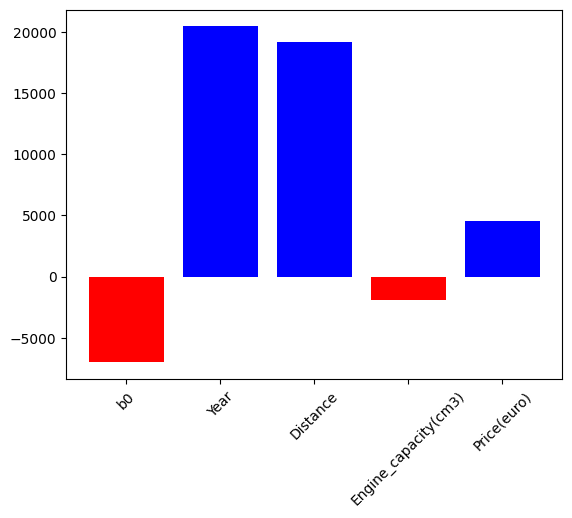

In [44]:
#@title Регуляризация Ridge { run: "auto" }
#@markdown ### Константа Регуларизации
alpha=249.01 #@param {type:"slider", min:0.01, max:250, step:1}

model = Ridge(alpha=alpha,max_iter=10000 )

model.fit(X_train, y_train)

B0=model.intercept_
B=model.coef_

line='{:.2f}'.format(B0)
sign=['+','-']

features_names = df_num.drop(columns = ['km_year']).columns
for p,(fn,b) in enumerate(zip(features_names,B)):
  if np.abs(b)>0:
    line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

print('Решение')
print(line)
print('\n')

y_predict=model.predict(X_test)

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))
print('R2 : %.4f' %  r2_score(y_test,y_predict))

weights_vis(B, B0, features_names)

## Поиск Лучших Гиперпараметров с Помощью Рандомизированного Поиска

In [45]:
alpha_range = loguniform(1e-4, 1e4) 

tuned_parameters = [{'alpha':  alpha_range }]

n_iter_search = 25

Ridge_search = RandomizedSearchCV(estimator = Ridge(max_iter=10000 ), verbose = 3,
                          param_distributions=tuned_parameters ,
                          cv=ShuffleSplit(n_splits=5, random_state=42),n_iter = n_iter_search)

Ridge_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...........alpha=356.0730912797582;, score=0.511 total time=   0.0s
[CV 2/5] END ...........alpha=356.0730912797582;, score=0.485 total time=   0.0s
[CV 3/5] END ...........alpha=356.0730912797582;, score=0.483 total time=   0.0s
[CV 4/5] END ...........alpha=356.0730912797582;, score=0.490 total time=   0.0s
[CV 5/5] END ...........alpha=356.0730912797582;, score=0.483 total time=   0.0s
[CV 1/5] END ...........alpha=740.1356242160049;, score=0.361 total time=   0.0s
[CV 2/5] END ...........alpha=740.1356242160049;, score=0.341 total time=   0.0s
[CV 3/5] END ...........alpha=740.1356242160049;, score=0.339 total time=   0.0s
[CV 4/5] END ...........alpha=740.1356242160049;, score=0.345 total time=   0.0s
[CV 5/5] END ...........alpha=740.1356242160049;, score=0.338 total time=   0.0s
[CV 1/5] END ..........alpha=166.46373670281164;, score=0.627 total time=   0.0s
[CV 2/5] END ..........alpha=166.46373670281164

RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=None, train_size=None),
                   estimator=Ridge(max_iter=10000), n_iter=25,
                   param_distributions=[{'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f06dfa380d0>}],
                   verbose=3)

In [46]:
Ridge_best=Ridge_search.best_estimator_
Ridge_best

Ridge(alpha=0.0001428689049499106, max_iter=10000)

In [47]:
Ridge_best.fit(X_train, y_train);

Посмотрим на результаты

In [48]:
DF_Ridge=pd.DataFrame(Ridge_search.cv_results_)            

Оставим минимум информации

In [49]:
DF_ = DF_Ridge[['param_alpha',
             'mean_test_score', 'std_test_score', 'rank_test_score']]
cm = sns.light_palette("green", as_cmap=True)
hl = DF_.sort_values(by = 'rank_test_score').style.background_gradient(cmap=cm)
hl

,param_alpha,mean_test_score,std_test_score,rank_test_score
3,0.000143,0.697830,0.008501,1
22,0.001013,0.697830,0.008501,2
16,0.001039,0.697830,0.008501,3
9,0.001731,0.697830,0.008501,4
4,0.005496,0.697830,0.008501,5
14,0.007221,0.697830,0.008501,6
13,0.019365,0.697830,0.008500,7
23,0.031990,0.697829,0.008499,8
5,0.034963,0.697829,0.008498,9
8,0.146911,0.697826,0.008490,10


## Поиск с помощью поиска по сетке

In [51]:
alpha_range = 10**np.linspace(-4, 4,15) 

tuned_parameters = [{'alpha':  alpha_range }]

Ridge_search_ = GridSearchCV(estimator = Ridge(max_iter=10000 ), verbose = 3,
                          param_grid=tuned_parameters ,
                          cv=ShuffleSplit(n_splits=5, random_state=42))

Ridge_search_.fit(X_train, y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ......................alpha=0.0001;, score=0.702 total time=   0.0s
[CV 2/5] END ......................alpha=0.0001;, score=0.685 total time=   0.0s
[CV 3/5] END ......................alpha=0.0001;, score=0.706 total time=   0.1s
[CV 4/5] END ......................alpha=0.0001;, score=0.691 total time=   0.1s
[CV 5/5] END ......................alpha=0.0001;, score=0.705 total time=   0.0s
[CV 1/5] END .......alpha=0.0003727593720314938;, score=0.702 total time=   0.0s
[CV 2/5] END .......alpha=0.0003727593720314938;, score=0.685 total time=   0.1s
[CV 3/5] END .......alpha=0.0003727593720314938;, score=0.706 total time=   0.0s
[CV 4/5] END .......alpha=0.0003727593720314938;, score=0.691 total time=   0.0s
[CV 5/5] END .......alpha=0.0003727593720314938;, score=0.705 total time=   0.1s
[CV 1/5] END .......alpha=0.0013894954943731374;, score=0.702 total time=   0.0s
[CV 2/5] END .......alpha=0.0013894954943731374;

In [52]:
Ridge_best=Ridge_search_.best_estimator_
Ridge_best

Ridge(alpha=0.0001, max_iter=10000)

In [53]:
Ridge_best.fit(X_train, y_train);

Посмотрим на результаты

In [54]:
DF_Ridge=pd.DataFrame(Ridge_search_.cv_results_)       

Оставим минимум информации

In [55]:
DF_ = DF_Ridge[['param_alpha',
             'mean_test_score', 'std_test_score', 'rank_test_score']]
cm = sns.light_palette("blue", as_cmap=True)
hl = DF_.sort_values(by = 'rank_test_score').style.background_gradient(cmap=cm)
hl

,param_alpha,mean_test_score,std_test_score,rank_test_score
0,0.000100,0.697830,0.008501,1
1,0.000373,0.697830,0.008501,2
2,0.001389,0.697830,0.008501,3
3,0.005179,0.697830,0.008501,4
4,0.019307,0.697830,0.008500,5
5,0.071969,0.697828,0.008496,6
6,0.268270,0.697823,0.008481,7
7,1.000000,0.697797,0.008428,8
8,3.727594,0.697627,0.008249,9
9,13.894955,0.696075,0.007816,10
